In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

# Multivariate Normaldistribution

[1, 0]
[1, 0.1]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


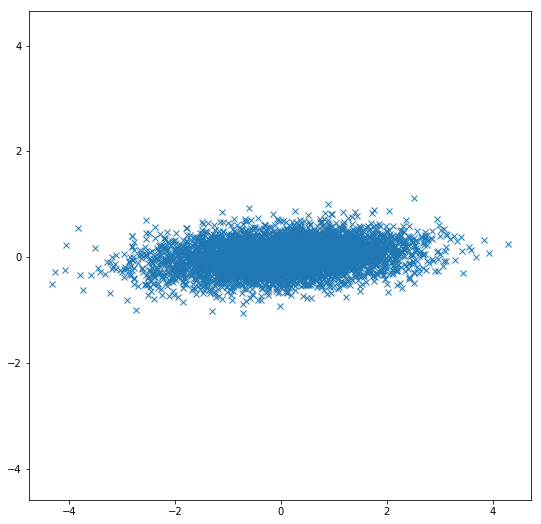

In [119]:
mean = (0,0)
cov = [[1,0],[1,0.1]]
x,y = np.random.multivariate_normal(mean, cov, 5000).T
print cov[0]
print cov[1]
plt.figure(figsize=[9,9])
plt.plot(x,y, 'x')
plt.axis('equal')
plt.show()


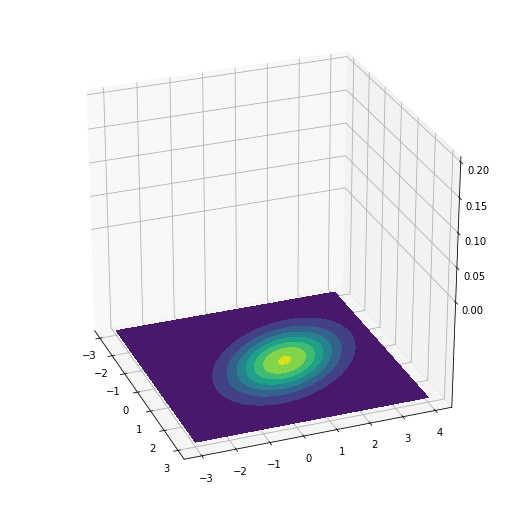

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=[9,9])
ax = fig.gca(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
#                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

# Regression Example
## Motor Trend

In [121]:
xls = pd.ExcelFile('mpg.xls')
MTdata = xls.parse(0)
MTdata

,Make,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [122]:
wt = np.array(MTdata['wt'])
mpg = np.array(MTdata['mpg'])

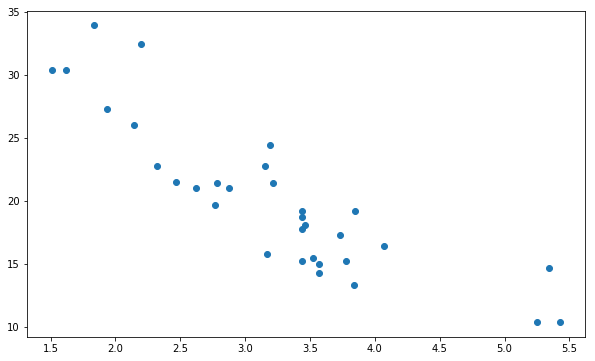

In [123]:
plt.figure(figsize=[10,6])
plt.plot(wt, mpg, 'o')

In [124]:
wt.shape

(32,)

In [125]:
A=np.array([[wt.shape[0], np.sum(wt)],[np.sum(wt),np.sum(wt**2)]])
b=np.array([np.sum(mpg),np.sum(wt*mpg)])

In [126]:
w=np.linalg.inv(A).dot(b)
w

array([37.28512617, -5.34447157])

Text(0.5,1,u'mpg vs. wt')

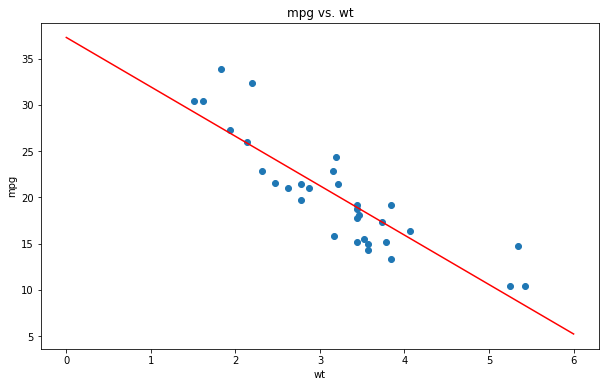

In [127]:
x = np.linspace(0,6,100)
y = w[0]+w[1]*x
plt.figure(figsize=[10,6])
plt.plot(wt, mpg, 'o')
plt.plot(x,y, 'r-')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mpg vs. wt')

In [128]:
wt2 = np.array([np.ones([wt.shape[0]]),wt,wt**2,wt**3, wt**4, wt**5, wt**6, wt**7, wt**8, wt**9]).T

In [129]:
w2 = np.linalg.inv(wt2.T.dot(wt2)).dot(wt2.T).dot(mpg)
w2

array([ 1.24222869e+04, -4.07767808e+04,  5.76504773e+04, -4.59984457e+04,
        2.28579496e+04, -7.34945648e+03,  1.53178108e+03, -1.99918672e+02,
        1.48520618e+01, -4.79318536e-01])

In [130]:
y2 = w2[0] + w2[1]*x + w2[2]*x**2 + w2[3]*x**3 + w2[4]*x**4 + w2[5]*x**5+ w2[6]*x**6+ w2[7]*x**7+ w2[8]*x**8+ w2[9]*x**9

(0, 40)

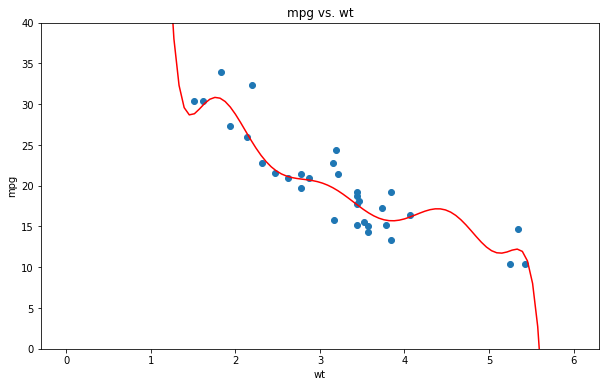

In [131]:
x = np.linspace(0,6,100)
y = w[0]+w[1]*x
plt.figure(figsize=[10,6])
plt.plot(wt, mpg, 'o')
plt.plot(x,y2, 'r-')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mpg vs. wt')
plt.ylim(0,40)

In [90]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"% (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 6


In [92]:
w1 = np.array([[1,3,5,3],[2,1,2,3]])
w2 = np.array([[7,8,9,8],[6,4,6,8]])
m1 = np.mean(w1,axis=1)
m2 = np.mean(w2,axis=1)
c1 = np.cov(w1)
c2 = np.cov(w2)
print m1, m2
print c1
print c2

[3. 2.] [8. 6.]
[[2.66666667 0.        ]
 [0.         0.66666667]]
[[0.66666667 0.        ]
 [0.         2.66666667]]


In [93]:
c1_inv = np.linalg.inv(c1)
c2_inv = np.linalg.inv(c2)


In [94]:
m1.T.dot(c1_inv)

array([1.125, 3.   ])

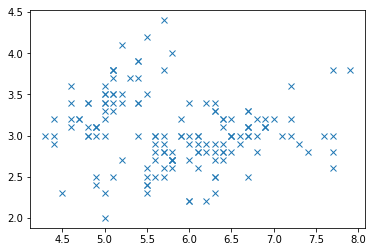

In [96]:
plt.plot(iris.data[:,0],iris.data[:,1],'x')

In [9]:
def ce(y, y_hat):
    return -np.mean(np.sum(y*np.log(y_hat)))
def mse(y, y_hat):
    return np.mean(np.square(y-y_hat))

In [30]:
y =     np.array([1, 0, 0, 0])
y_hat = np.array([0.7, 0.5, 0.5, 0.3])

In [11]:
print ('mse : %.3f') %(mse(y,y_hat))
print ('ce  : %.3f') %(ce(y,y_hat))

mse : 0.170
ce  : 0.357


In [37]:
y =     np.array([1, 0, 0, 0])
y_hat = np.array([0.7, 0.1, 0.1, 0.1])

In [38]:
print ('mse : %.3f') %(mse(y,y_hat))
print ('ce  : %.3f') %(ce(y,y_hat))

mse : 0.030
ce  : 0.357


In [43]:
y_hat = np.array([0.7, 0.1, 0.1, 0.1])

In [44]:
softmax(y_hat)

array([0.37786684, 0.20737772, 0.20737772, 0.20737772])

In [49]:
y_hat = np.array([2, 0.1, 0.1, 0.1])

In [50]:
softmax(y_hat)

array([0.69027125, 0.10324292, 0.10324292, 0.10324292])

In [53]:
A=np.array([[-1,3,2],[0,-2,1],[1,0,-2]])
np.linalg.det(A)

3.0000000000000004